**PART-B Modelling**

In [3]:
import itertools
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
import random
from geopy.geocoders import Nominatim

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the Datasets for Modelling**

In [5]:
bangalore_df=pd.read_csv('/content/drive/MyDrive/archive/Bangalore.csv')
chennai_df=pd.read_csv('/content/drive/MyDrive/archive/Chennai.csv')
mumbai_df=pd.read_csv('/content/drive/MyDrive/archive/Mumbai.csv')
kolkata_df=pd.read_csv('/content/drive/MyDrive/archive/Kolkata.csv')
hyderabad_df=pd.read_csv('/content/drive/MyDrive/archive/Hyderabad.csv')
delhi_df=pd.read_csv('/content/drive/MyDrive/archive/Delhi.csv')

In [6]:
print(f'The shape of bangalore data is {bangalore_df.shape}')
print(f'The shape of bangalore data is {chennai_df.shape}')
print(f'The shape of bangalore data is {mumbai_df.shape}')
print(f'The shape of bangalore data is {kolkata_df.shape}')
print(f'The shape of bangalore data is {hyderabad_df.shape}')
print(f'The shape of bangalore data is {delhi_df.shape}')

The shape of bangalore data is (6207, 40)
The shape of bangalore data is (5014, 40)
The shape of bangalore data is (7719, 40)
The shape of bangalore data is (6507, 40)
The shape of bangalore data is (2518, 40)
The shape of bangalore data is (4998, 40)


In [7]:
bangalore_df['city']='Bangalore'
chennai_df['city']='Chennai'
mumbai_df['city']='Mumbai'
kolkata_df['city']='Kolkata'
hyderabad_df['city']='Hyderabad'
delhi_df['city']='Delhi'

**Feature Creation**

In [8]:
master_df=pd.read_csv('/content/drive/MyDrive/master_df_with_column_names.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
master_df.shape

(704765, 145)

In [10]:
master_df.head()

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,...,Availability of assets: Scooter/Motorcycle/Moped,Availability of assets: Car/Jeep/Van,Availability of assets: Households with TV,Availability of assets: None of the assets specified in col. 10 to 19,Households by Type of Structure of Census Houses: Permanent,Households by Type of Structure of Census Houses: Semi-Permanent,Households by Type of Structure of Census Houses: Total Temporary,Households by Type of Structure of Census Houses: Serviceable,Households by Type of Structure of Census Houses: Non-Serviceable,Households by Type of Structure of Census Houses: Unclassifiable
0,35,ANDAMAN & NICOBAR ISLANDS,638,Nicobars,0,Nicobars,0,0,District - Nicobars,Total,...,20.0,1.9,0.8,10.4,31.4,65.1,1.3,0.6,0.8,2.1
1,35,ANDAMAN & NICOBAR ISLANDS,638,Nicobars,0,Nicobars,0,0,District - Nicobars,Rural,...,20.0,1.9,0.8,10.4,31.4,65.1,1.3,0.6,0.8,2.1
2,35,ANDAMAN & NICOBAR ISLANDS,638,Nicobars,5916,Car Nicobar,0,0,Sub-Dist - Car Nicobar,Total,...,25.4,3.0,0.7,10.0,16.6,82.2,0.6,0.1,0.5,0.5
3,35,ANDAMAN & NICOBAR ISLANDS,638,Nicobars,5916,Car Nicobar,0,0,Sub-Dist - Car Nicobar,Rural,...,25.4,3.0,0.7,10.0,16.6,82.2,0.6,0.1,0.5,0.5
4,35,ANDAMAN & NICOBAR ISLANDS,638,Nicobars,5916,Car Nicobar,645012,0,Mus,Rural,...,20.2,3.6,0.3,11.0,17.1,81.8,1.0,0.5,0.5,0.0


**Household Quality of Living Index **(HQLI)
To assess the household quality of living only for Indian states, a Household Quality of living Index
(HQLI) is constructed on the basis of 20 variables. Here, Union Territories (UTs) are excluded to equalize the parity of the states. HQLI is made up of three distinctive indices such as quality of housing index
(QHI), basic amenity index (BAI) and asset index (AI). The selected 20 variables fall under these three
indices. The variable details are given below 

**HQLI= QHI + BAI + AI**

**Quality of Housing Index** (QHI)
1. HHs by good condition of residential census houses
2. HHs living in permanent houses
3. Married couples do not have exclusive room
4. HHs with own houses
5. HHs having at least two dwelling rooms
**Basic Amenity Index** (BAI)
HHs having following amenities/facilities
1. Drinking water with in premises
2. Electricity
3. Latrine within premises
4. Bath room
5. Closed drainage system for waste water outlet
6. Separate kitchen inside the house
7. LPG/PNG for cooking
8. Banking service
**Asset Index** (AI)
HHs having following assets
1. Radio/Transistor
2. Television
3. Telephone facilities (mobile, landline or both)
4. Bicycle
5. Scooter/Motorcycle/Moped
6. Car/Jeep/Van
7. Computer/Laptop (with or without internet)

**NOTE**

1. Since we have 6 districts, We calculate HQLI for only these states.

2. We are not calculating HQLI based on locality as there was no mapping for each area name.So we are calculating for each state.

3. The six states that we will calculate the HQLI are Karnataka,Tamil Nadu,West Bengal,Maharastra,Delhi,
Andhra Pradesh (For hyderabad as Telangana was not created before 2011).  


1. **Calculating QI**

In [11]:
master_df['atleast two dwelling rooms']=master_df['Number of Dwelling Rooms: Two rooms']+master_df['Number of Dwelling Rooms: Three rooms']+master_df['Number of Dwelling Rooms: Four rooms']
+master_df['Number of Dwelling Rooms: Five rooms']+master_df['Number of Dwelling Rooms: Six rooms and above']


0         0.4
1         0.4
2         0.0
3         0.0
4         0.0
         ... 
704760    0.0
704761    0.6
704762    0.0
704763    5.0
704764    5.0
Length: 704765, dtype: float64

In [12]:
QI_features = ['Number of households with condition of Census House as: Residence (Good)','Households by Type of Structure of Census Houses: Permanent',
'Number of Dwelling Rooms: No exclusive room','Ownership status: Owned','atleast two dwelling rooms']

weights=[0.1,0.2,0.3,0.4,0.5]

random.seed(100)
for i in range(5):
  master_df[QI_features[i]]=master_df[QI_features[i]]*random.choice(weights)


In [13]:
master_df['QI'] = master_df['Number of households with condition of Census House as: Residence (Good)'] + master_df['Households by Type of Structure of Census Houses: Permanent']
+ master_df['Number of Dwelling Rooms: No exclusive room']+ master_df['Ownership status: Owned']+master_df['atleast two dwelling rooms']

0         42.74
1         42.74
2         44.00
3         44.00
4         50.10
          ...  
704760    52.04
704761    48.32
704762    40.00
704763    50.26
704764    50.26
Length: 704765, dtype: float64

**Calculating BAI**

In [14]:
BAI_features = ['Location of drinking water source: Within premises','Main Source of lighting: Electricity','Number of households having latrine facility within the premises',
                'Number of households having bathing facility within the premises: Yes (Bathroom)','Waste water outlet connected to: Closed drainage',
                'Kitchen facility: Cooking inside house:','Type of Fuel used for Cooking: LPG/PNG','Total number of households availing banking services']

weights=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

random.seed(100)
for i in range(8):
  master_df[BAI_features[i]]=master_df[BAI_features[i]]*random.choice(weights)

In [15]:
master_df['BAI'] = master_df['Location of drinking water source: Within premises'] + master_df['Main Source of lighting: Electricity']
+ master_df['Number of households having latrine facility within the premises']+ master_df['Number of households having bathing facility within the premises: Yes (Bathroom)']
+master_df['Waste water outlet connected to: Closed drainage']+master_df['Kitchen facility: Cooking inside house:']+master_df['Type of Fuel used for Cooking: LPG/PNG']
+master_df['Total number of households availing banking services']

0         18.24
1         18.24
2         18.44
3         18.44
4         18.52
          ...  
704760    19.78
704761     9.72
704762     0.00
704763    19.64
704764    19.64
Name: Total number of households availing banking services, Length: 704765, dtype: float64

**Calculating AI**

In [16]:
master_df['computer_laptop_with_and_without_internet']=master_df['Availability of assets: Computer/Laptop (With Internet)']+master_df['Availability of assets: Computer/Laptop (Without Internet)']

AI_features = ['Availability of assets: Radio/Transistor','Availability of assets: Television','Availability of assets: Telephone/Mobile Phone (Both)',
               'Availability of assets: Bicycle','Availability of assets: Scooter/Motorcycle/Moped','Availability of assets: Car/Jeep/Van','computer_laptop_with_and_without_internet']

weights=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]

random.seed(100)
for i in range(7):
  master_df[AI_features[i]]=master_df[AI_features[i]]*random.choice(weights)

In [17]:
master_df['AI'] = master_df['Availability of assets: Radio/Transistor'] + master_df['Availability of assets: Television']
+ master_df['Availability of assets: Telephone/Mobile Phone (Both)']+ master_df['Availability of assets: Bicycle']
+master_df['Availability of assets: Scooter/Motorcycle/Moped']+master_df['Availability of assets: Car/Jeep/Van']+master_df['computer_laptop_with_and_without_internet']

0          6.06
1          6.06
2          7.68
3          7.68
4          6.40
          ...  
704760     5.40
704761    36.12
704762     0.00
704763    12.60
704764    12.60
Length: 704765, dtype: float64

**Calculating Housing quality loving index**

HQLI= QHI + BAI + AI

In [18]:
master_df['HQLI']=master_df['QI']+master_df['BAI']+master_df['AI']

In [19]:
master_df['HQLI'].head()

0    144.82
1    144.82
2    146.47
3    146.47
4    147.89
Name: HQLI, dtype: float64

In [20]:
state_hqli_df=pd.DataFrame(master_df.groupby(['State Name'],as_index=False)['HQLI'].agg(np.mean))

In [21]:
state_hqli_df.reset_index(drop=True, inplace=True)

In [22]:
state_hqli_df

,State Name,HQLI
0,ANDAMAN & NICOBAR ISLANDS,106.940304
1,ANDHRA PRADESH,134.402972
2,ARUNACHAL PRADESH,68.533484
3,ASSAM,62.098144
4,BIHAR,61.030085
5,CHANDIGARH,194.290600
6,CHHATTISGARH,87.510581
7,DADRA & NAGAR HAVELI,134.667113
8,DAMAN & DIU,189.836438
9,GOA,182.468419


**Observation**
1. A weighted sum approach was taken to calculate HQLI.
2. The weights are randomly chosen and as  we can see the values eventually  become relative across the states.

**Creating the dataset for model**

**Adding HQLI for each district**

In [23]:
bangalore_df['HQLI']=state_hqli_df[state_hqli_df['State Name']=='KARNATAKA']['HQLI'][15]
chennai_df['HQLI']=state_hqli_df[state_hqli_df['State Name']=='TAMIL NADU']['HQLI'][30]
mumbai_df['HQLI']=state_hqli_df[state_hqli_df['State Name']=='MAHARASHTRA']['HQLI'][19]
kolkata_df['HQLI']=state_hqli_df[state_hqli_df['State Name']=='WEST BENGAL']['HQLI'][34]
hyderabad_df['HQLI']=state_hqli_df[state_hqli_df['State Name']=='ANDHRA PRADESH']['HQLI'][1]
delhi_df['HQLI']=state_hqli_df[state_hqli_df['State Name']=='NCT OF DELHI']['HQLI'][24]

In [24]:
final_df = pd.concat([bangalore_df, chennai_df,mumbai_df,kolkata_df,hyderabad_df,delhi_df], axis=0)

In [25]:
final_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,city,HQLI
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,Bangalore,136.431802
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,Bangalore,136.431802
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,Bangalore,136.431802
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Bangalore,136.431802
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,Bangalore,136.431802


**Important Note**
1. Since we know that housing prices vary across each city, We plan to create features for model to differentiate each city and make better price prediction.
2. We created Latitude and Longitude features for each location using geocode.
3. We also one hot encoded the city names for differentiating houses across the cities.

In [26]:
# Adding the latitute and longitute for the places
location=Nominatim(user_agent="http")

def get_location_code(x):
    try:
        cordinates=location.geocode(x)
        return cordinates.latitude, cordinates.longitude  
    except:
        return "Not found", "Not found"

In [27]:
# Finding latitude and longitude for unique loactions only to speed up the execution
unique_location=final_df['Location'].unique()
location_to_code={}
for place in unique_location:
    location_to_code[place]=get_location_code(place)

In [28]:
final_df['Latitude'],final_df['Longitude']=zip(*final_df['Location'].map(location_to_code))

In [29]:
city_data=pd.get_dummies(final_df.city, prefix='city')
final_df = pd.concat([final_df, city_data], axis=1)

In [30]:
final_df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,city,HQLI,Latitude,Longitude,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,Bangalore,136.431802,12.915551,77.577431,1,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,Bangalore,136.431802,13.050502,77.49217,1,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,Bangalore,136.431802,Not found,Not found,1,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,Bangalore,136.431802,12.971319,77.696477,1,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,Bangalore,136.431802,12.917657,77.483757,1,0,0,0,0,0


In [31]:
# Removing the 'Not found' records
final_df=final_df[final_df['Latitude']!='Not found'].reset_index(drop=True)

In [32]:
final_df.shape

(30070, 50)

In [33]:
final_df['Latitude']=final_df['Latitude'].astype('float')
final_df['Longitude']=final_df['Longitude'].astype('float')

**Note**

**Since for a set of houses, nothing was mentioned about certain amenities, '9' was used to mark such values, which could indicate the absence of information about the apartment. We will be dropping these values**

In [34]:
#dropping the rows which have no values
final_df=final_df.replace(9,np.NaN)
final_df.dropna(axis=0,inplace=True)

In [35]:
final_df.shape

(9226, 50)

In [36]:
final_df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'city', 'HQLI',
       'Latitude', 'Longitude', 'city_Bangalore', 'city_Chennai', 'city_Delhi',
       'city_Hyderabad', 'city_Kolkata', 'city_Mumbai'],
      dtype='object')

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import tree

In [38]:
X=final_df.drop(['Price','Location','city'],axis=1)
y=final_df['Price']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

**Modelling**

**Linear Regression**

In [40]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

y_pred_l_reg = l_reg.predict(X_test)

In [41]:
mse_l_reg=mean_squared_error(y_test, y_pred_l_reg)
rmse_l_reg=np.sqrt(mse_l_reg)
mae_l_reg=mean_absolute_error(y_test, y_pred_l_reg)
r2_score_l_reg=r2_score(y_test, y_pred_l_reg)

In [42]:
print(f'Mean squared error for Linear Regression is {mse_l_reg}')
print(f'Root Mean squared error for Linear Regressionis {rmse_l_reg}')
print(f'Mean absolute error for Linear Regression is {mae_l_reg}')
print(f' R2 Score for Linear Regression is {r2_score_l_reg}')

Mean squared error for Linear Regression is 68161812665700.97
Root Mean squared error for Linear Regressionis 8256016.755415469
Mean absolute error for Linear Regression is 3785556.5688220332
 R2 Score for Linear Regression is 0.6141006393923598


**Decision Tree Model**

In [43]:
dtr = DecisionTreeRegressor(random_state=100)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=100)

In [44]:
y_pred = dtr.predict(X_test)

In [45]:
mse_decision_tree=mean_squared_error(y_test, y_pred)
rmse_decision_tree=np.sqrt(mse_decision_tree)
mae_decision_tree=mean_absolute_error(y_test, y_pred)
r2_score_decision_tree=r2_score(y_test, y_pred)

In [46]:
print(f'Mean squared error for descion tree is {mse_decision_tree}')
print(f'Root Mean squared error for descion tree is {rmse_decision_tree}')
print(f'Mean absolute error for descion tree is {mae_decision_tree}')
print(f' R2 Score for descion tree is {r2_score_decision_tree}')

Mean squared error for descion tree is 84899284110728.64
Root Mean squared error for descion tree is 9214080.752344677
Mean absolute error for descion tree is 1896312.695482221
 R2 Score for descion tree is 0.5193411358488902


**Random Forest Model**

In [47]:
# Plot Permutation Importance
def plot_permute_importance(result,X,y):
    plt.xkcd(scale=0.3,randomness=0.6)
    
    # Plot for random forest
    fig, (ax1) = plt.subplots(1, figsize=(14, 12))

    tree_importance_sorted_idx = np.argsort(result.importances_mean)
    tree_indices = np.arange(0, len(result.importances_mean)) +0.5

    ax1.barh(tree_indices, result.importances_mean[tree_importance_sorted_idx], xerr=list(result['importances_std']),
              height=0.7, color=['b', 'g', 'r', 'c', 'm', 'y', 'g'])
    ax1.set_yticks(tree_indices)
    ax1.set_yticklabels(X.columns[tree_importance_sorted_idx], fontsize=12)
    ax1.set_ylim((0, len(result.importances_mean)))
    ax1.set_xlim(left=0.)
    ax1.set_xlabel("Importance", fontsize=16)

    ax1.set_ylabel("Features", fontsize=16)
    ax1.set_title("Permutation Feature Importance", fontsize=18)
    fig.tight_layout()
    plt.show()

In [48]:
# Finding best params for Random Forest using OOB score
import itertools as it
import warnings
from collections import OrderedDict
warnings.filterwarnings('ignore')

param_dict = OrderedDict(n_estimators = [10, 20, 30, 40, 50, 100, 150, 200, 250], max_features = (range(2, 10)), max_depth=(range(2,10)))

allNames = sorted(param_dict)
combinations = it.product(*(param_dict[Name] for Name in allNames))
combinations=list(combinations)

best_params={}
for i in range(len(combinations)):
    max_features,max_depth, n_estimators=combinations[i]
    rf=RandomForestRegressor(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth,oob_score=True,random_state=100)
    rf.fit(X_train,y_train)
    oob_error= 1 - rf.oob_score_
    best_params[combinations[i]]=oob_error

n_estimators, max_features, max_depth = min(zip(best_params.values(), best_params.keys()))[1]
print(f'The best parameters through having lowest obb_error is {n_estimators, max_features, max_depth}')

The best parameters through having lowest obb_error is (9, 9, 50)


In [49]:
# Fit the model with best features
rf=RandomForestRegressor(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth,oob_score=True)
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

In [50]:
mse_rf=mean_squared_error(y_test, rf_pred)
rmse_rf=np.sqrt(mse_rf)
mae_rf=mean_absolute_error(y_test, rf_pred)
r2_score_rf=r2_score(y_test, rf_pred)

In [51]:
print(f'Mean squared error for Random Forest model is {mse_rf}')
print(f'Root Mean squared error for Random Forest model is {rmse_rf}')
print(f'Mean absolute error for Random Forest model is {mae_rf}')
print(f' R2 Score for Random Forest model is {r2_score_rf}')

Mean squared error for Random Forest model is 17222943014450.607
Root Mean squared error for Random Forest model is 4150053.3748917747
Mean absolute error for Random Forest model is 1644583.9856303937
 R2 Score for Random Forest model is 0.9024919902049092


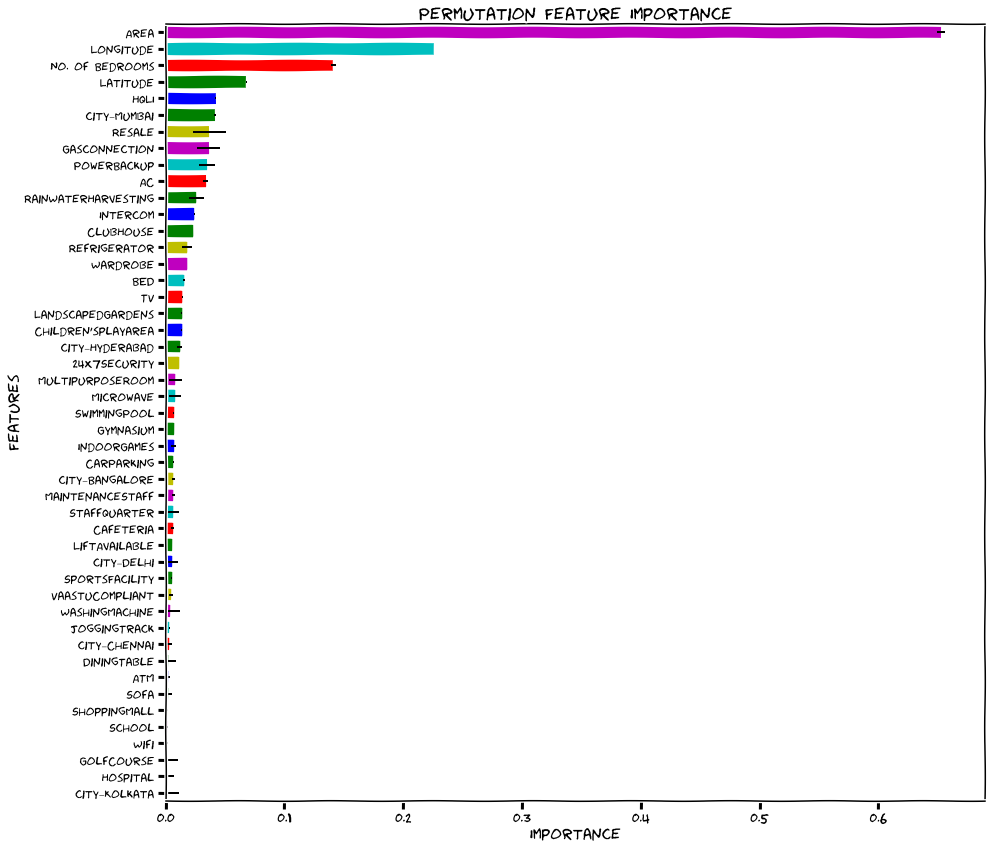

In [52]:
# Find best features using Permutation Importance

result_rf=permutation_importance(rf, X_train, y_train)
plot_permute_importance(result_rf,X_train,y_train)

**XGBOOST MODEL**

In [53]:
import xgboost as xg

In [54]:
xgb1 = xg.XGBRegressor(random_state=100)
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [0.6,0.7], 
              'max_depth': [3,4,5,6],
              'min_child_weight': [3,4],
              'subsample': [0.5],
              'colsample_bytree': [0.7],
              'n_estimators': [400]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 5,
                        n_jobs=-1,
                        scoring='r2',
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.7039417453494982
{'colsample_bytree': 0.7, 'learning_rate': 0.6, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 400, 'objective': 'reg:squarederror', 'subsample': 0.5}


In [55]:
xgb1 = xg.XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.6, max_depth=6, min_child_weight= 3, n_estimators= 400,  objective= 'reg:squarederror', subsample= 0.5)

In [56]:
xgb1.fit(X_train,y_train)

XGBRegressor(colsample_bytree=0.7, learning_rate=0.6, max_depth=6,
             min_child_weight=3, n_estimators=400, objective='reg:squarederror',
             subsample=0.5)

In [57]:
y_pred_xgboost = xgb1.predict(X_test)

In [58]:
mse_xgboost=mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost=np.sqrt(mse_xgboost)
mae_xgboost=mean_absolute_error(y_test, y_pred_xgboost)
r2_score_xgboost=r2_score(y_test, y_pred_xgboost)

In [59]:
print(f'Mean squared error for XGBoost is {mse_xgboost}')
print(f'Root Mean squared error for XGBoost is {rmse_xgboost}')
print(f'Mean absolute error for XGBoost is {mae_xgboost}')
print(f' R2 Score for XGBoost is {r2_score_xgboost}')

Mean squared error for XGBoost is 36509591462600.945
Root Mean squared error for XGBoost is 6042316.729748693
Mean absolute error for XGBoost is 2203831.0243773707
 R2 Score for XGBoost is 0.7933002740029321


**Comparing all Model Results**

In [60]:
# Comparing test accuracy performance of all models
r2_score_values_list=[r2_score_l_reg,r2_score_decision_tree,r2_score_rf,r2_score_xgboost]
r2_score_names_list=['Linear_Regression_r2_score','decision_tree_r2_score','rf_r2_score','xgboost_r2_score']

Text(0.5, 1.0, 'Model vs r2_score plot')

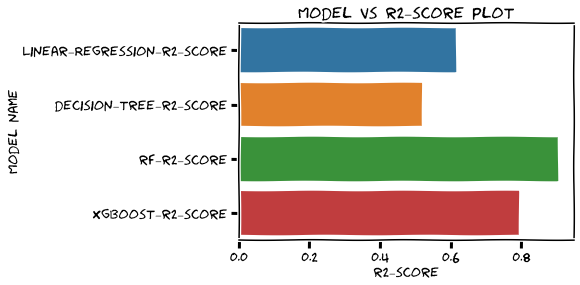

In [61]:
sns.barplot(y=r2_score_names_list,x=r2_score_values_list,orient = 'h')
plt.tight_layout
plt.xlabel('r2_score')
plt.ylabel('Model name')
plt.title('Model vs r2_score plot')

In [62]:
!pip install prettytable 
from prettytable import PrettyTable

In [66]:
myTable = PrettyTable(["model Name", "Mean Squared Error",'Root Mean Squared Error',"Mean Absolute error","R2_score"])
  
# Add rows
myTable.add_row(["Linear Regression", round(mse_l_reg,2), round(rmse_l_reg,2),round(mae_l_reg,2), round(r2_score_l_reg,2)])
myTable.add_row(["Decision Tree", round(mse_decision_tree,2), round(rmse_decision_tree,2),round(mae_decision_tree,2), round(r2_score_decision_tree,2)])
myTable.add_row(["Random Forest", round(mse_rf,2), round(rmse_rf,2),round(mae_rf,2), round(r2_score_rf,2)])
myTable.add_row(["XGBoost", round(mse_xgboost,2), round(rmse_xgboost,2),round(mae_xgboost,2), round(r2_score_xgboost,2)])

In [67]:
print(myTable)

+-------------------+--------------------+-------------------------+---------------------+----------+
|     model Name    | Mean Squared Error | Root Mean Squared Error | Mean Absolute error | R2_score |
+-------------------+--------------------+-------------------------+---------------------+----------+
| Linear Regression | 68161812665700.97  |        8256016.76       |      3785556.57     |   0.61   |
|   Decision Tree   | 84899284110728.64  |        9214080.75       |      1896312.7      |   0.52   |
|   Random Forest   | 17222943014450.61  |        4150053.37       |      1644583.99     |   0.9    |
|      XGBoost      | 36509591462600.94  |        6042316.73       |      2203831.02     |   0.79   |
+-------------------+--------------------+-------------------------+---------------------+----------+


**Model Interpretation**

In [68]:
pip install shap

     |████████████████████████████████| 564 kB 5.2 MB/s 


In [69]:
import shap
# load JS visualization code to notebook
shap.initjs()

**SHAP**

SHAP is a unified approach to explain the output of any machine learning model. SHAP connects game theory with local explanations, representing the only possible consistent and locally accurate additive feature attribution method based on expectations (More details : http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions).

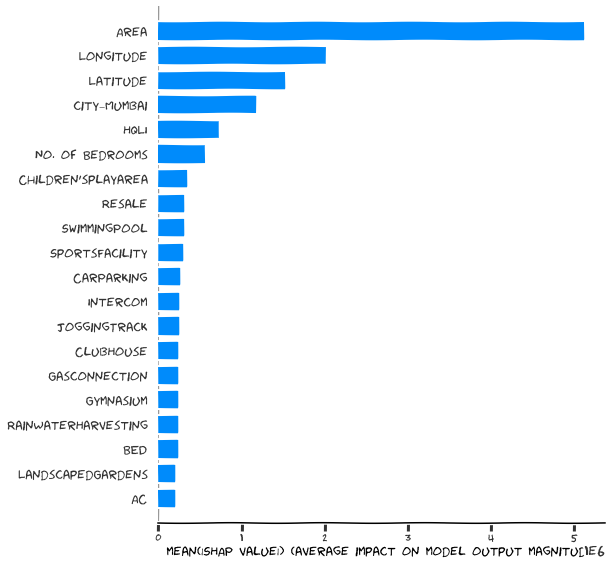

In [70]:

shap_values = shap.TreeExplainer(xgb1).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

**Observation**

1.We observe that Area,Latitude,Longitude are among the top important features used by XGBoost for prediction.
2.This makes sense as area increases price increase.
3.Latitude and Longitude also make sense as they define a particular location and price vary across various locations.

In [71]:
X_sampled = X_train.sample(100, random_state=10)

In [72]:
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(X_sampled)

In [73]:
# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled.iloc[0,:])

**Observation**

The above explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue (these force plots are introduced in our Nature BME paper).

In [ ]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. SHAP values represent a feature's responsibility for a change in the model output. Vertical dispersion represents interaction effects with other features. To help reveal these interactions dependence_plot automatically selects another feature for coloring.

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_sampled)

**Results**

1. We see that Random forest and XGBoost do much better in prediction when compared to linear regression and decision tree.
2. Random Forest outperforms all the models with a r2 score as high as 0.9.
3. The mean absolute error observed states that we are off by 16L which is quite decent when the prices of the house are in Crores.


**Future Work**

1. We would like to explore more models like lightgbm and Neural Networks.
2. We would try Stacking or cascading techniques and evaluate the performance of such methods.
3. Probably spend more time creating more features for better prediction.